C:\Users\willi\AppData\Local\Temp\ipykernel_82204\2565807004.py:21: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  entries = mpr.summary.search(chemsys=chemical_system)


Retrieving SummaryDoc documents:   0%|          | 0/41 [00:00<?, ?it/s]


Semiconducting materials in Ti-S:
formula  band_gap (eV)  formation_energy_per_atom (eV)
   TiS2         0.2055                       -1.465774
   TiS3         0.2261                       -1.341742
  Ti3S4         0.2669                        0.847748
   TiS2         0.7773                       -1.439357
    TiS         0.7957                        1.132035
   TiS2         1.6382                       -1.380241


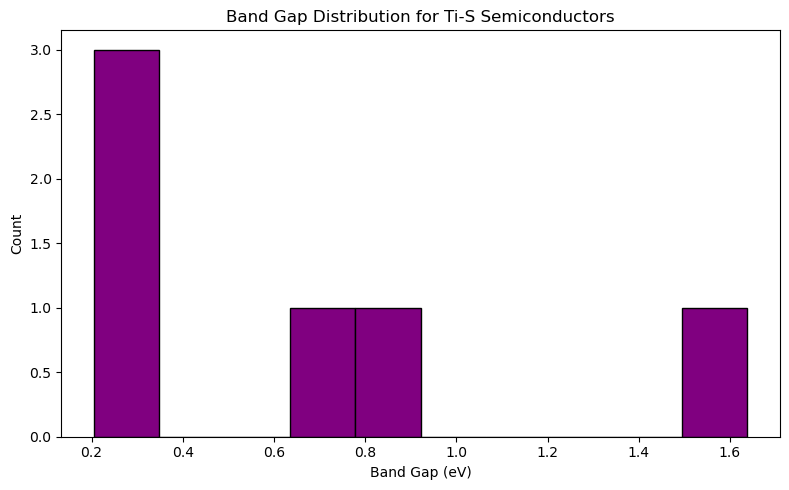

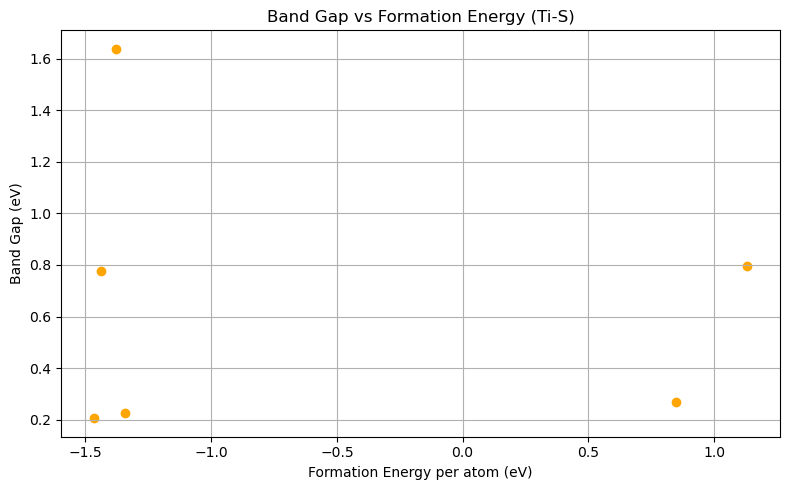

In [5]:
# Finding Semiconductors

import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
import pandas as pd

# Insert your Materials Project API key here
API_KEY = "kuR5OwjqUO5HSWsAzcvrW40AcQQyHLpJ"

# User-defined chemical system
chemical_system = "Ti-S"

# Band gap criteria for semiconductors
BANDGAP_MIN = 0.1
BANDGAP_MAX = 4.0

# Initialize MPRester
mpr = MPRester(API_KEY)

# Search for all materials in the chemical system
entries = mpr.summary.search(chemsys=chemical_system)

# Filter for semiconductors within band gap range
semiconductors = []
for entry in entries:
    if entry.band_gap and BANDGAP_MIN <= entry.band_gap <= BANDGAP_MAX:
        semiconductors.append({
            "formula": entry.formula_pretty,
            "band_gap (eV)": entry.band_gap,
            "formation_energy_per_atom (eV)": entry.formation_energy_per_atom
        })

# Convert to DataFrame
df = pd.DataFrame(semiconductors)
# Display for if none exist
if df.empty:
    print(f"No semiconducting materials found in {chemical_system}.")
# Display if does exist
else:
    # Display table
    print(f"\nSemiconducting materials in {chemical_system}:")
    print(df.sort_values('band_gap (eV)').to_string(index=False))

    # Plot band gap distribution (histogram)
    plt.figure(figsize=(8,5))
    plt.hist(df["band_gap (eV)"], bins=10, color='purple', edgecolor='black')
    plt.title(f"Band Gap Distribution for {chemical_system} Semiconductors")
    plt.xlabel("Band Gap (eV)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # Plot scatter plot: Band gap vs Formation energy
    plt.figure(figsize=(8,5))
    plt.scatter(df["formation_energy_per_atom (eV)"], df["band_gap (eV)"], color='orange')
    plt.title(f"Band Gap vs Formation Energy ({chemical_system})")
    plt.xlabel("Formation Energy per atom (eV)")
    plt.ylabel("Band Gap (eV)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
